# Continuous Wavelet Transform Potential Field

In [4]:
"""
GravMag: Forward gravity modeling using a stack of 3D polygonal model
"""
import json
import cPickle as pickle
import numpy as np
import os
from IPython.display import Image
from fatiando import mesher, gridder, utils
from fatiando.gravmag import prism
from fatiando.vis import mpl, myv
import colorcet as cc

In [16]:
# The position/size of anomaly
min_depth = 0
max_depth = 4000
delta_z = 500
length = 5000
min_y = -5000
min_x = -4000
max_x = 4000
# The bounds of the region
bounds = [-10000, 10000, -10000, 10000, 0, 5000]
area = bounds[:4]
# Determine number of depth slices
depths = np.linspace(min_depth,max_depth,100)
depths = np.flipud(depths)
model = [];

In [17]:
# Create list of Prisms that descend in depth 
delta_y = length/len(depths)
for i in range(1, len(depths)):
    start_y = min_y + (i - 1)*delta_y
    stop_y  = start_y+delta_y
    model.append(
        mesher.Prism(min_x,max_x,start_y,stop_y, max_depth , depths[i - 1],
                    {'density': 500}))

model.append(mesher.Prism(min_x,max_x,stop_y,stop_y+5000,max_depth, min_depth,{'density': 500}))    

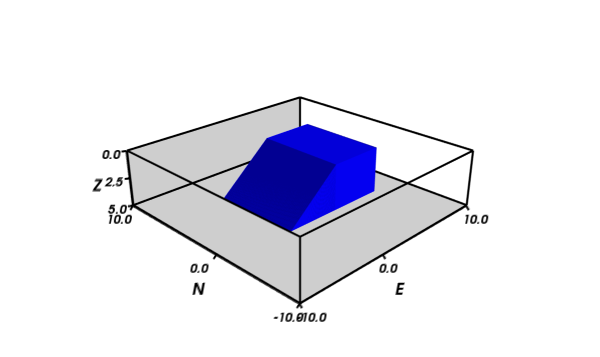

In [18]:
# Visualize the model
myv.figure(size=(600,400))
myv.prisms(model, prop='density',edges=False)
myv.axes(myv.outline(bounds), ranges=[b*0.001 for b in bounds], nlabels=3, fmt='%.1f')
myv.wall_north(bounds)
myv.wall_bottom(bounds)
myv.savefig('./dippinggrav_model.png')
myv.show()
Image(filename='./dippinggrav_model.png')


In [19]:
# Create a regular grid at 100m height
shape = (200, 200)
xp, yp, zp = gridder.regular(area, shape, z=-500)

In [20]:
# Calculate the anomaly for a given regional field
gz = prism.gz(xp, yp, zp, model)

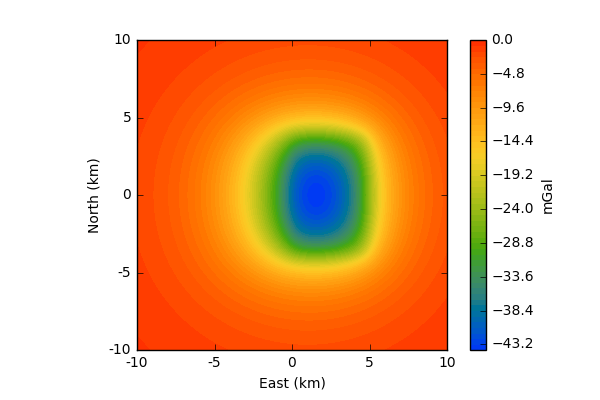

In [21]:
mpl.figure()
mpl.axis('scaled')
mpl.contourf(yp, xp, gz, shape, 60, cmap=cc.m_rainbow)
cb = mpl.colorbar().set_label('mGal')
mpl.m2km()
mpl.xlabel('East (km)')
mpl.ylabel('North (km)')
mpl.savefig('./dippinggrav_synthetic_data.png')
Image(filename='./dippinggrav_synthetic_data.png')

In [22]:
np.savetxt('./data/syntheticgrav_data.txt', np.transpose([xp, yp, zp, gz]))

with open('./data/metadata_grav.json', 'w') as f:
    json.dump(dict(area=area, bounds=bounds, shape=shape), f)
with open('./data/model_grav.pickle', 'w') as f:
    pickle.dump(model, f)

# Ricker Wavelet

In [23]:
from scipy import signal
import matplotlib.pyplot as plt

In [24]:
cwtmatr = signal.cwt(gz,signal.ricker,np.arange(1, 31))

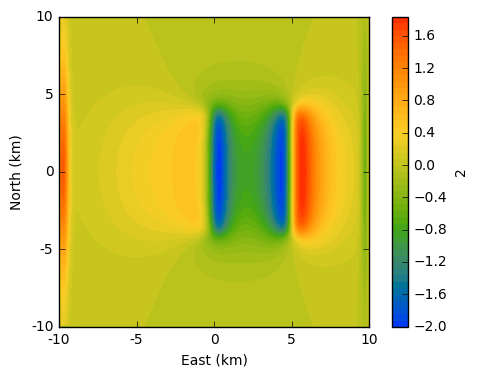

In [26]:
mpl.figure()
mpl.axis('scaled')
mpl.contourf(yp, xp, np.reshape(cwtmatr[2],[200, 200]), shape, 60, cmap=cc.m_rainbow)
cb = mpl.colorbar().set_label('2')
mpl.m2km()
mpl.xlabel('East (km)')
mpl.ylabel('North (km)')
mpl.show()

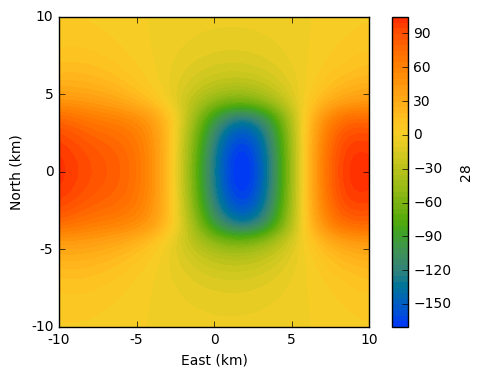

In [28]:
mpl.figure()
mpl.axis('scaled')
mpl.contourf(yp, xp, np.reshape(cwtmatr[28],[200, 200]), shape, 60, cmap=cc.m_rainbow)
cb = mpl.colorbar().set_label('28')
mpl.m2km()
mpl.xlabel('East (km)')
mpl.ylabel('North (km)')
mpl.show()